In [4]:
# Import libraries

In [5]:
import pandas as pd # used for data preprocessing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns #data visualization
import missingno as msno #missing data visualization
from collections import Counter #

In [97]:
df=pd.read_csv("Public_TransportEDA.csv")

In [99]:
#print the first top roles
df.head()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday


In [101]:
#print the last roles
df.tail()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
995,TRIP0996,train,North Station,West End,2024-01-01 22:35:00,NaN,40.546670,51.0,2024-02-11,Saturday
996,TRIP0997,Bus,Central,West End,2024-01-01 22:36:00,63.0,7.772635,35.0,2024-02-11,Thursday
997,TRIP0998,FERRY,West End,North Station,2024-01-01 22:37:00,23.0,NaN,8.0,2024-02-11,Saturday
998,TRIP0999,Tram,South Point,Central,2024-01-01 22:38:00,9.0,43.300617,169.0,2024-02-11,Sunday
999,TRIP1000,train,Airport,West End,2024-01-01 22:39:00,34.0,8.168803,21.0,2024-02-11,Tuesday


In [103]:
# exploring the the nos of columns and rows
df.shape

(1000, 10)

In [105]:
# To know the content in the columns
df.columns

Index(['Trip_ID', 'Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week'],
      dtype='object')

In [107]:
#checking to see more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_ID                1000 non-null   object 
 1   Mode_of_Transport      1000 non-null   object 
 2   Departure_Station      1000 non-null   object 
 3   Arrival_Station        1000 non-null   object 
 4   Departure_Time         1000 non-null   object 
 5   Passenger_Count        900 non-null    float64
 6   Fare_Amount            900 non-null    float64
 7   Trip_Duration_Minutes  900 non-null    float64
 8   Trip_Date              1000 non-null   object 
 9   Day_of_Week            1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.3+ KB


# Explore Missing data

In [109]:
#Using differences between mean or median to detect missing values
df.describe()

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes
count,900.000000,900.000000,900.000000
mean,49.154444,25.360742,94.270000
std,27.698270,14.464556,50.634982
min,1.000000,0.500576,5.000000
25%,25.000000,12.818196,49.750000
50%,48.000000,25.403856,97.500000
75%,72.000000,37.866623,138.000000
max,99.000000,49.945184,179.000000


In [14]:
#including the object data to check for missing values/data
df.describe(include=["object","bool"])

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Trip_Date,Day_of_Week
count,1000,1000,1000,1000,1000,1000,1000
unique,1000,9,7,7,1000,42,7
top,TRIP0001,Bus,North Station,South Point,2024-01-01 06:00:00,2024-01-01,Sunday
freq,1,147,171,171,1,24,167


In [15]:
#mean to check missing values among the columns
df.isnull().mean()*100

Trip_ID                   0.0
Mode_of_Transport         0.0
Departure_Station         0.0
Arrival_Station           0.0
Departure_Time            0.0
Passenger_Count          10.0
Fare_Amount              10.0
Trip_Duration_Minutes    10.0
Trip_Date                 0.0
Day_of_Week               0.0
dtype: float64

<Axes: >

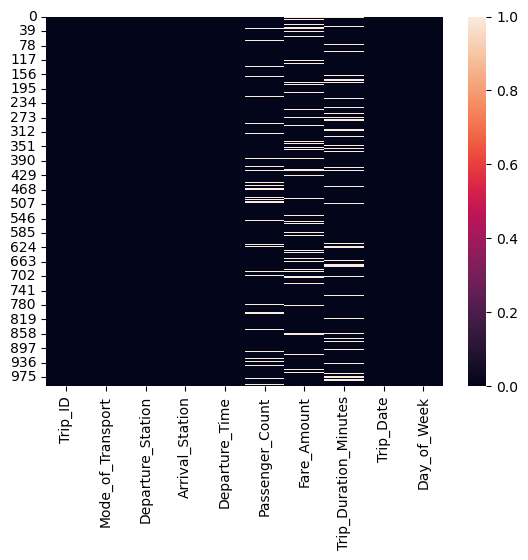

In [111]:
#check and show the missing data on a heatmap

sns.heatmap(df.isnull())

In [113]:
#Fill missing values through median
df["Passenger_Count"]=df["Passenger_Count"].fillna(df["Passenger_Count"].median())
df["Fare_Amount"]=df["Fare_Amount"].fillna(df["Fare_Amount"].median())
df["Trip_Duration_Minutes"]=df["Trip_Duration_Minutes"].fillna(df["Trip_Duration_Minutes"].median())
#df["Total_Amount"]=df["Total_Amount"].fillna(df["Total_Amount"].median())

In [115]:
#check for the missing values again

df.isnull().mean()*100

Trip_ID                  0.0
Mode_of_Transport        0.0
Departure_Station        0.0
Arrival_Station          0.0
Departure_Time           0.0
Passenger_Count          0.0
Fare_Amount              0.0
Trip_Duration_Minutes    0.0
Trip_Date                0.0
Day_of_Week              0.0
dtype: float64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_ID                1000 non-null   object 
 1   Mode_of_Transport      1000 non-null   object 
 2   Departure_Station      1000 non-null   object 
 3   Arrival_Station        1000 non-null   object 
 4   Departure_Time         1000 non-null   object 
 5   Passenger_Count        1000 non-null   float64
 6   Fare_Amount            1000 non-null   float64
 7   Trip_Duration_Minutes  1000 non-null   float64
 8   Trip_Date              1000 non-null   object 
 9   Day_of_Week            1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.3+ KB


# checking for duplicates

In [119]:
df.duplicated().sum()

0

# Drop Trip ID

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_ID                1000 non-null   object 
 1   Mode_of_Transport      1000 non-null   object 
 2   Departure_Station      1000 non-null   object 
 3   Arrival_Station        1000 non-null   object 
 4   Departure_Time         1000 non-null   object 
 5   Passenger_Count        1000 non-null   float64
 6   Fare_Amount            1000 non-null   float64
 7   Trip_Duration_Minutes  1000 non-null   float64
 8   Trip_Date              1000 non-null   object 
 9   Day_of_Week            1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.3+ KB


In [123]:
#Drop Trip_ID before converting to date

df.drop("Trip_ID", axis=1,inplace=True)

In [25]:
df.head()

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday
2,bus,Central,North Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday
3,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Sunday
4,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday


# Convert Trip date(object) to datetime 

In [125]:
#Convert your date

df["Trip_Date"]=pd.to_datetime(df["Trip_Date"])

In [127]:
#check 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Mode_of_Transport      1000 non-null   object        
 1   Departure_Station      1000 non-null   object        
 2   Arrival_Station        1000 non-null   object        
 3   Departure_Time         1000 non-null   object        
 4   Passenger_Count        1000 non-null   float64       
 5   Fare_Amount            1000 non-null   float64       
 6   Trip_Duration_Minutes  1000 non-null   float64       
 7   Trip_Date              1000 non-null   datetime64[ns]
 8   Day_of_Week            1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 70.4+ KB


In [129]:
#extract the year, month, quarter

#create new column for year, for month , month name and for quarter

df["year"]=df["Trip_Date"].dt.year
df["month"]=df["Trip_Date"].dt.month
df["month_name"]=df["Trip_Date"].dt.month_name() 
df["quarter"]=df["Trip_Date"].dt.quarter


In [131]:
df.head()

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,year,month,month_name,quarter
0,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,2024,1,January,1
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,2024,1,January,1
2,bus,Central,North Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday,2024,1,January,1
3,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Sunday,2024,1,January,1
4,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday,2024,1,January,1


In [133]:
df.tail()

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,year,month,month_name,quarter
995,train,North Station,West End,2024-01-01 22:35:00,48.0,40.546670,51.0,2024-02-11,Saturday,2024,2,February,1
996,Bus,Central,West End,2024-01-01 22:36:00,63.0,7.772635,35.0,2024-02-11,Thursday,2024,2,February,1
997,FERRY,West End,North Station,2024-01-01 22:37:00,23.0,25.403856,8.0,2024-02-11,Saturday,2024,2,February,1
998,Tram,South Point,Central,2024-01-01 22:38:00,9.0,43.300617,169.0,2024-02-11,Sunday,2024,2,February,1
999,train,Airport,West End,2024-01-01 22:39:00,34.0,8.168803,21.0,2024-02-11,Tuesday,2024,2,February,1


# Handling Inconsistencies

In [135]:
#Removing the Mode of transport inconsistencies

df.loc[df["Mode_of_Transport"]=="FERRY", "Mode_of_Transport"]= "Ferry"
df.loc[df["Mode_of_Transport"]=="bus", "Mode_of_Transport"]= "Bus"
df.loc[df["Mode_of_Transport"]=="BUS", "Mode_of_Transport"]= "Bus"
df.loc[df["Mode_of_Transport"]=="fErry", "Mode_of_Transport"]= "Ferry"
df.loc[df["Mode_of_Transport"]=="train", "Mode_of_Transport"]= "Train"

In [137]:
df.head()

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,year,month,month_name,quarter
0,Ferry,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,2024,1,January,1
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,2024,1,January,1
2,Bus,Central,North Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday,2024,1,January,1
3,Ferry,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Sunday,2024,1,January,1
4,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday,2024,1,January,1


In [139]:
df["Mode_of_Transport"].value_counts()

Mode_of_Transport
Bus      332
Ferry    287
Train    243
Tram     138
Name: count, dtype: int64

In [141]:
#Removing the Departure station inconsistencies

df.loc[df["Departure_Station"]=="North Station", "Departure_Station"]= "North_Station"
df.loc[df["Departure_Station"]=="West End", "Departure_Station"]= "West_End"
df.loc[df["Departure_Station"]=="South Point", "Departure_Station"]= "South_Point"
df.loc[df["Departure_Station"]==" Central ", "Departure_Station"]= "Central"

In [143]:
df.head()

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,year,month,month_name,quarter
0,Ferry,West_End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,2024,1,January,1
1,Tram,North_Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,2024,1,January,1
2,Bus,Central,North Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday,2024,1,January,1
3,Ferry,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Sunday,2024,1,January,1
4,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday,2024,1,January,1


In [145]:
df["Departure_Station"].value_counts()

Departure_Station
Central          208
North_Station    171
Downtown         167
West_End         159
Airport          157
South_Point      138
Name: count, dtype: int64

In [147]:
# Removing the Arrival Station inconsistencies
df["Arrival_Station"].value_counts()

Arrival_Station
South Point      171
Downtown         168
West End         163
Airport          163
Central          160
North Station    125
airport           50
Name: count, dtype: int64

In [149]:
df.loc[df["Arrival_Station"]=="South Point","Arrival_Station"]="South_Point"
df.loc[df["Arrival_Station"]=="West End","Arrival_Station"]="West_End"
df.loc[df["Arrival_Station"]=="airport","Arrival_Station"]="Airport"
df.loc[df["Arrival_Station"]=="North Station","Arrival_Station"]="North_Station"

In [151]:
df["Arrival_Station"].value_counts()

Arrival_Station
Airport          213
South_Point      171
Downtown         168
West_End         163
Central          160
North_Station    125
Name: count, dtype: int64

In [153]:
df.columns

Index(['Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week', 'year', 'month',
       'month_name', 'quarter'],
      dtype='object')

# Total amount made

In [209]:
# Total amount made at each depature

df["Total_Amount"]=df["Passenger_Count"]* df["Fare_Amount"]

In [211]:
#Fill missing values through median
df["Passenger_Count"]=df["Passenger_Count"].fillna(df["Passenger_Count"].median())
df["Fare_Amount"]=df["Fare_Amount"].fillna(df["Fare_Amount"].median())
df["Trip_Duration_Minutes"]=df["Trip_Duration_Minutes"].fillna(df["Trip_Duration_Minutes"].median())
df["Total_Amount"]=df["Total_Amount"].fillna(df["Total_Amount"].median())

In [213]:
df.head()

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,year,month,month_name,quarter,Total_Amount
0,Ferry,West_End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,2024,1,January,1,91.216483
1,Tram,North_Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,2024,1,January,1,950.975482
2,Bus,Central,North_Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday,2024,1,January,1,2311.750939
3,Ferry,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Sunday,2024,1,January,1,101.722157
4,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday,2024,1,January,1,1676.654527


In [161]:
df["month_name"].value_counts()

month_name
January     744
February    256
Name: count, dtype: int64

In [163]:
df["year"].value_counts()

year
2024    1000
Name: count, dtype: int64

In [165]:
df["quarter"].value_counts()

quarter
1    1000
Name: count, dtype: int64

# Average fare amount

In [167]:
average_fare = df["Fare_Amount"].mean()
print("Average Fare:", average_fare)


Average Fare: 25.365053397993


# Data Analysis
### Using the univariate to check for outliers and compare data as well

In [53]:
#numerical_df=df.select_dtypes(exclude='object')

In [54]:
#numerical_df.head()

In [55]:
#for index, column_name in enumerate(numerical_df):
#    print(column_name)

# Using Univariate Analysis and box plot , visualize the numerical data

In [2]:
#checking the figures and the fig sizes
#fig, axs=plt.subplots(nrows=2,ncols=2,figsize=(15,10))

In [169]:
df.columns

Index(['Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week', 'year', 'month',
       'month_name', 'quarter', 'Total_Amount'],
      dtype='object')

Text(0.5, 1.0, 'Histogram on Total Amount')

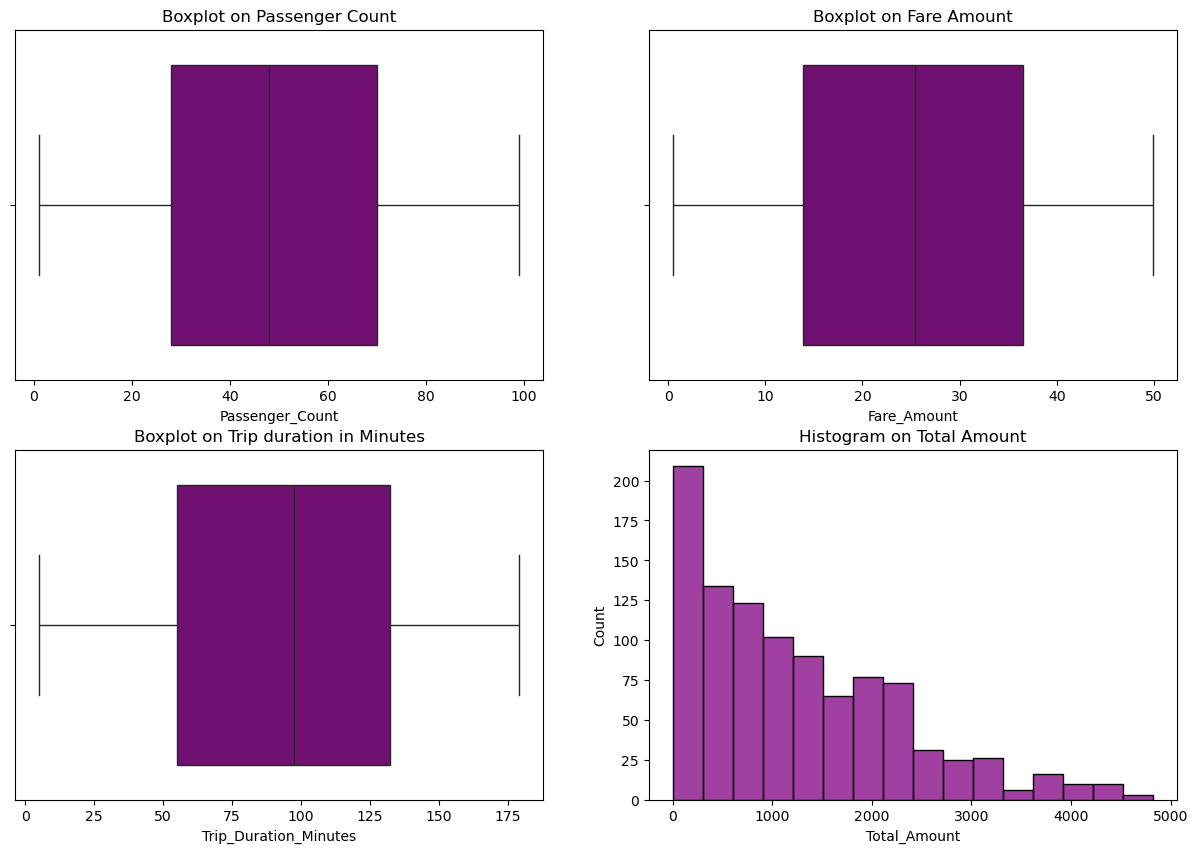

In [171]:
#using univariate analysis for Numerical visualization
fig, axs=plt.subplots(nrows=2,ncols=2,figsize=(15,10))

sns.boxplot(x="Passenger_Count", data=df, ax=axs[0,0],color="Purple")
axs[0,0].set_title("Boxplot on Passenger Count")

sns.boxplot(x="Fare_Amount", data=df, ax=axs[0,1],color="Purple")
axs[0,1].set_title("Boxplot on Fare Amount")

sns.boxplot(x="Trip_Duration_Minutes", data=df, ax=axs[1,0],color="Purple")
axs[1,0].set_title("Boxplot on Trip duration in Minutes")

sns.histplot(x="Total_Amount", data=df, ax=axs[1,1],color="Purple")
axs[1,1].set_title("Histogram on Total Amount")

# Describe your observation
##### for the passenger count, it means the concentration of passengers count that  usually travels or uses the mode of transport specified ranges between 28 and 70.
##### Also for the fare amount, majority of the passengers pay an amount between 12 and 38$ to get to their location.
##### Majority of the trip duration in minutes was betwwen 52 minutes and 2 hours 10 minutes.
##### The histogram shows that there is an outlier in the data, The highest total amount made is about 4800, twhich from a small group of passengers. 

In [61]:
df.head()

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,year,month,month_name,quarter,Total_Amount
0,Ferry,West_End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,2024,1,January,1,91.216483
1,Tram,North_Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,2024,1,January,1,950.975482
2,Bus,Central,North_Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday,2024,1,January,1,2311.750939
3,Ferry,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Sunday,2024,1,January,1,101.722157
4,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday,2024,1,January,1,1676.654527


# Univariate analysis for Categorical visualization

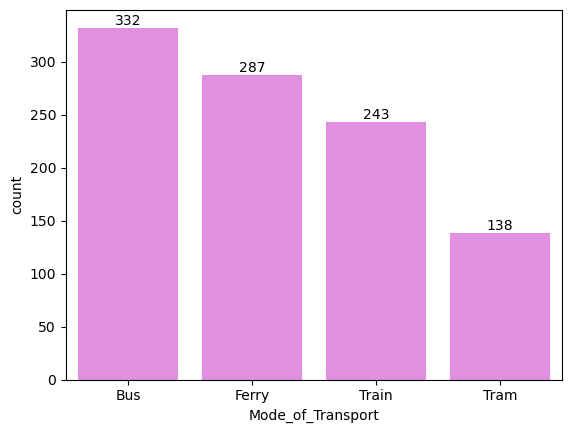

In [173]:
# How many transactions by each mode of transportation?

ax=sns.countplot(x=df["Mode_of_Transport"], order=df["Mode_of_Transport"].value_counts(ascending=False).index,color="Violet")
values=df["Mode_of_Transport"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

# Place in your observation for mode of transport here
##### The highest mode of transportation used is the Bus, this means passengers used the Bus to commute regularly more than the rest.

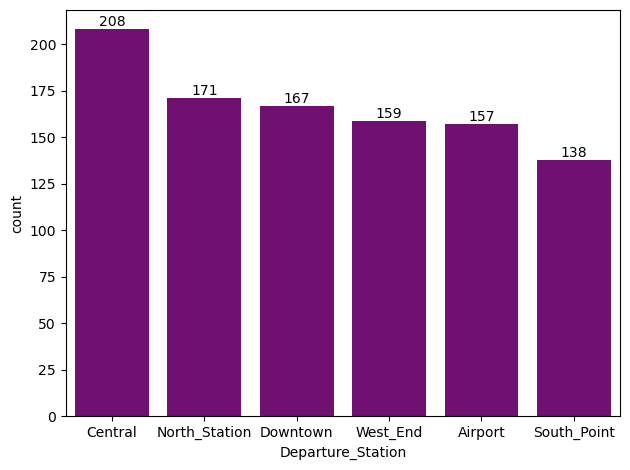

In [215]:
# number of times people landed at each departure station

ax=sns.countplot(x=df["Departure_Station"], order=df["Departure_Station"].value_counts(ascending=False).index,color="purple")
values=df["Departure_Station"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

plt.tight_layout()
plt.show()

# place your observation on departure station here
#### The most used departure station is the Central station because it has the highest count.

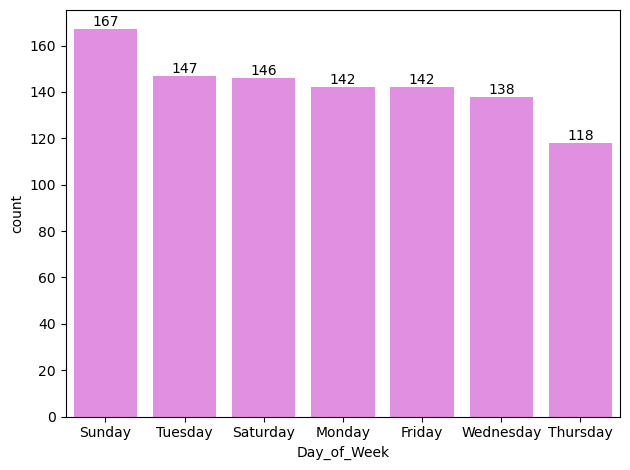

In [177]:
#days people travel the most

ax=sns.countplot(x=df["Day_of_Week"], order=df["Day_of_Week"].value_counts(ascending=False).index,color="violet")
values=df["Day_of_Week"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

plt.tight_layout()
plt.show()

# Place your observation on day of the week here
#### Observation shows that passengers commute more on Sundays than any other day.

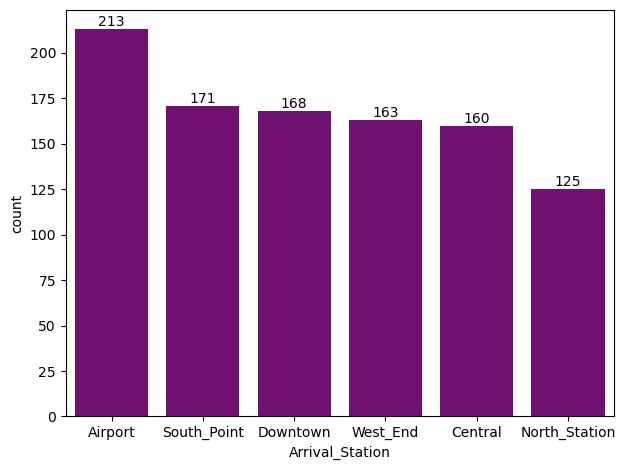

In [179]:
#number of times landing at each Arrival station 
ax=sns.countplot(x=df["Arrival_Station"], order=df["Arrival_Station"].value_counts(ascending=False).index,color="purple")
values=df["Arrival_Station"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

plt.tight_layout()
plt.show()

# Place your Observation on Arrival Station here
#### This shows that the most frequent arrival station used is the Airport Arrival Station. This station must be very close to the Bus station .

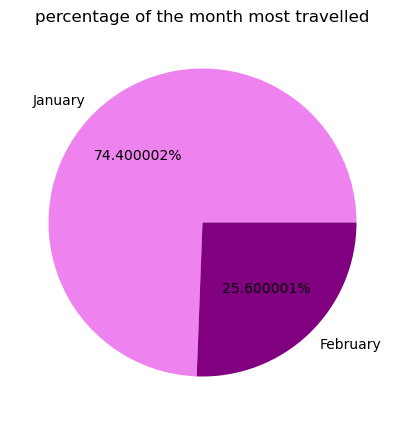

In [181]:
#total number of times people travelled the most within the months

fig,ax=plt.subplots(figsize=(5,5))
count=Counter(df["month_name"])
ax.pie(count.values(), labels=count.keys(),autopct=lambda p:f'{p:2f}%', colors= ["Violet", "purple"])
ax.set_title("percentage of the month most travelled")
plt.show();

# Place your observation about both months here
#### This shows that people commute  more in January than February as it is in this chart.

# Bivariate Analysis
##### Used to analyze two Numerical data or one numerical and one catgorical data

In [74]:
df.head()

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,year,month,month_name,quarter,Total_Amount
0,Ferry,West_End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,2024,1,January,1,91.216483
1,Tram,North_Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,2024,1,January,1,950.975482
2,Bus,Central,North_Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday,2024,1,January,1,2311.750939
3,Ferry,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Sunday,2024,1,January,1,101.722157
4,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday,2024,1,January,1,1676.654527


In [75]:
df["Departure_Time"].value_counts()

Departure_Time
2024-01-01 06:00:00    1
2024-01-01 17:11:00    1
2024-01-01 16:58:00    1
2024-01-01 16:59:00    1
2024-01-01 17:00:00    1
                      ..
2024-01-01 11:38:00    1
2024-01-01 11:39:00    1
2024-01-01 11:40:00    1
2024-01-01 11:41:00    1
2024-01-01 22:39:00    1
Name: count, Length: 1000, dtype: int64

In [183]:
from datetime import datetime

# To group departure time, change departure time from 3 string hours to 1 string hour

In [1]:
# To group departure time, change departure time from 3 string hours to 1 string hour
#df["Departure_Time"].dt.hour

In [ ]:
df["Departure_Time_hour"]=df["Departure_Time"].dt.hour

In [201]:
df.head()

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,year,month,month_name,quarter,Total_Amount
0,Ferry,West_End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,2024,1,January,1,91.216483
1,Tram,North_Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,2024,1,January,1,950.975482
2,Bus,Central,North_Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday,2024,1,January,1,2311.750939
3,Ferry,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Sunday,2024,1,January,1,101.722157
4,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday,2024,1,January,1,1676.654527


In [ ]:
df.info()

In [ ]:
def Departure_Time_hour(x):
    print (x)

In [ ]:
#To group the departure time
def Departure_Time_hour(x):
   print (x)
   if (x<=5):
        return "0-5 invalid traveling"
   elif (x<=9):
        return "6-9 Early Travelers"
   elif (x<=13):
        return "10-13 Midday Travelers"
   elif (x<=17):
        return "14-17 Afternoon Travelers"
   elif (x<=21):
        return "18-21 Evening Travelers"
   else:   
        return "22-23 Night crawlers" 
df["Departure_Time_hour"]=df["Departure_Time_hour"].apply(Departure_Time_hour)

In [ ]:
df.columns

In [ ]:
df.head()

Text(0.5, 1.0, 'Total passenger count by Total_Amount')

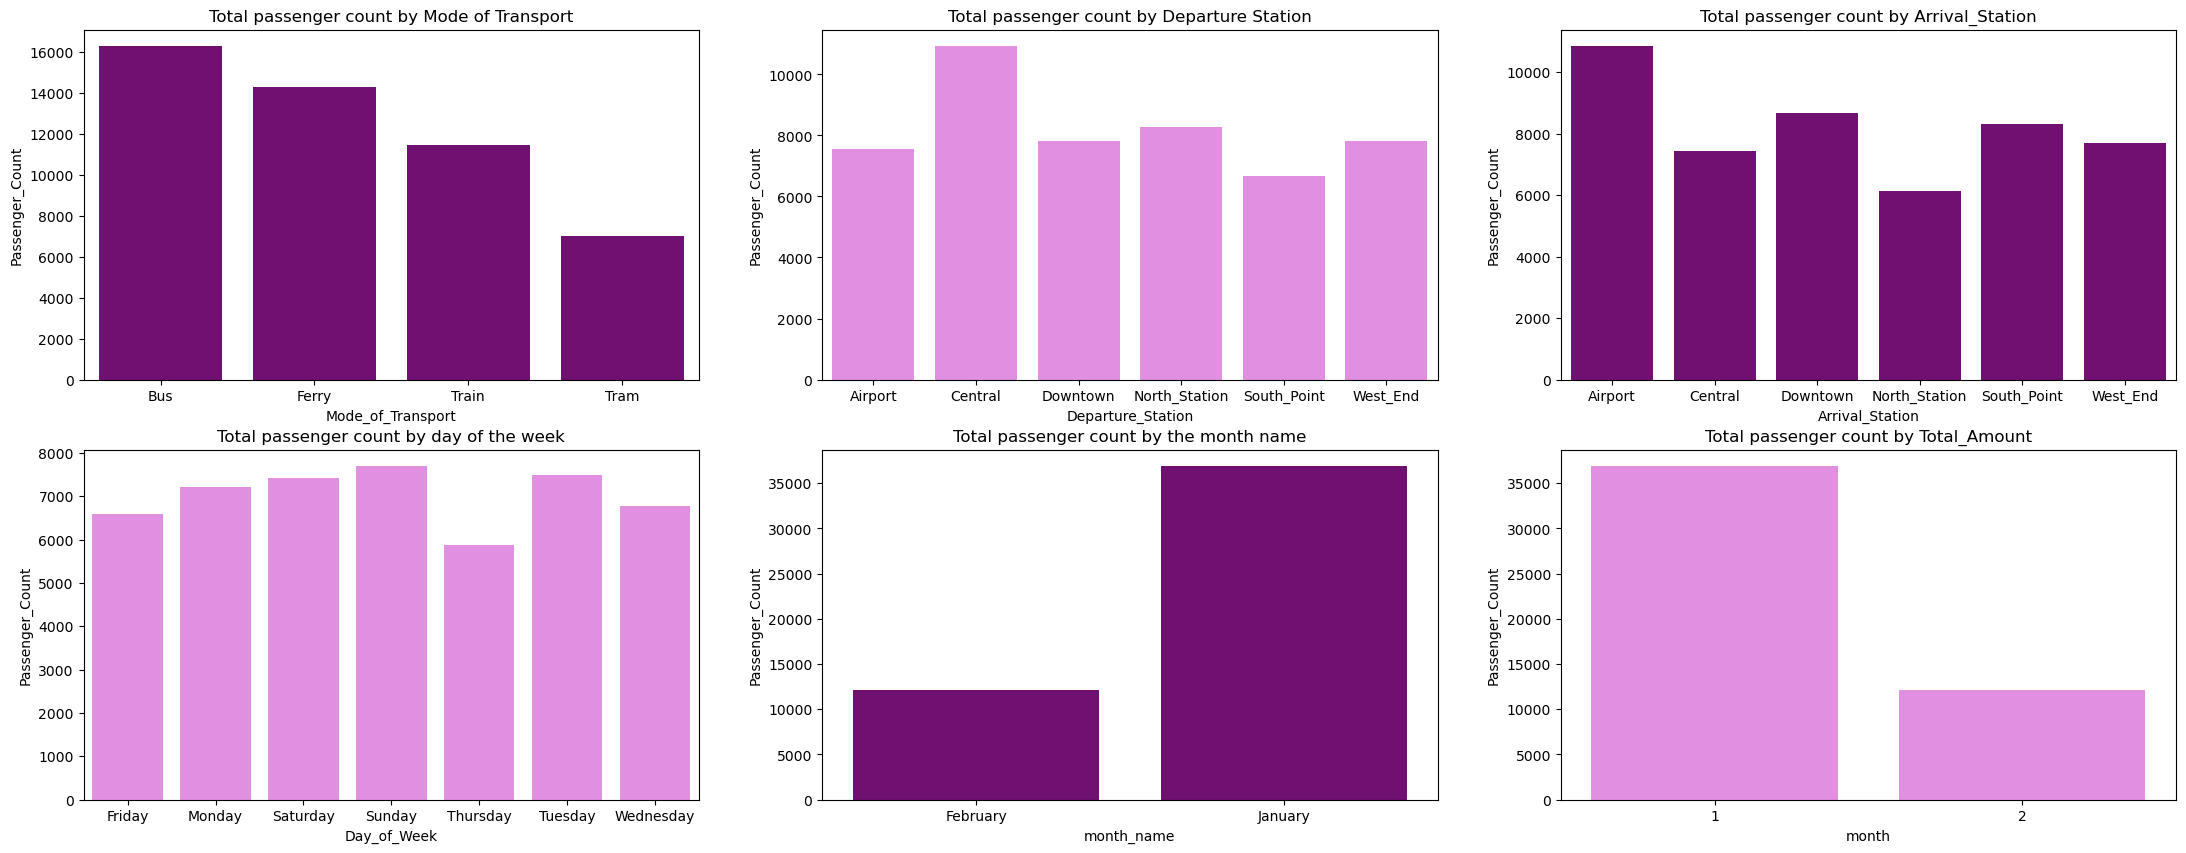

In [237]:
#Number of passenger count by MT,DS,AS,DW,MN

fig, axs=plt.subplots(nrows=2, ncols=3, figsize=(27,10))

Transp_Pass=df.groupby("Mode_of_Transport")["Passenger_Count"].sum().reset_index()
sns.barplot(x="Mode_of_Transport", data=Transp_Pass, y="Passenger_Count",color="purple", ax=axs[0,0])
axs[0,0].set_title("Total passenger count by Mode of Transport")


Dep_Pass=df.groupby("Departure_Station")["Passenger_Count"].sum().reset_index()
sns.barplot(x="Departure_Station", data=Dep_Pass, y="Passenger_Count",color="violet", ax=axs[0,1])
axs[0,1].set_title("Total passenger count by Departure Station")

Arr_Pass=df.groupby("Arrival_Station")["Passenger_Count"].sum().reset_index()
sns.barplot(x="Arrival_Station", data=Arr_Pass, y="Passenger_Count",color="purple", ax=axs[0,2])
axs[0,2].set_title("Total passenger count by Arrival_Station")

Day_Pass=df.groupby("Day_of_Week")["Passenger_Count"].sum().reset_index()
sns.barplot(x="Day_of_Week", data=Day_Pass, y="Passenger_Count",color="violet", ax=axs[1,0])
axs[1,0].set_title("Total passenger count by day of the week")

month_pass=df.groupby("month_name")["Passenger_Count"].sum().reset_index()
sns.barplot(x="month_name", data=month_pass, y="Passenger_Count",color="purple", ax=axs[1,1])
axs[1,1].set_title("Total passenger count by the month name")

#use this later
month_pass=df.groupby("month")["Passenger_Count"].sum().reset_index()
sns.barplot(x="month", data=month_pass, y="Passenger_Count", color="violet", ax=axs[1,2])
axs[1,2].set_title("Total passenger count by Total_Amount")



# Narrate your observation
#### The passenger count by Mode of transportation in the 1st graph shows that passengers commute more by Bus than ferry or Train
#### The passenger count by Departure station in the 2nd graph shows that passengers frequently use Central as their departure station
#### The passenger count by Arrival station in the 3rd graph shows that passengers arrive frequently around the airport area
#### The passenger count by day of the week in the 4th graph shows that  passengers travel more on sundays followed by Tuesdays
#### The passenger count by month name in the 5th graph shows that passengers commute mostly in January when compared with february in 2024

In [ ]:
# Bivariate for categorical and numerical, numerical and numerical

In [ ]:
df.head()

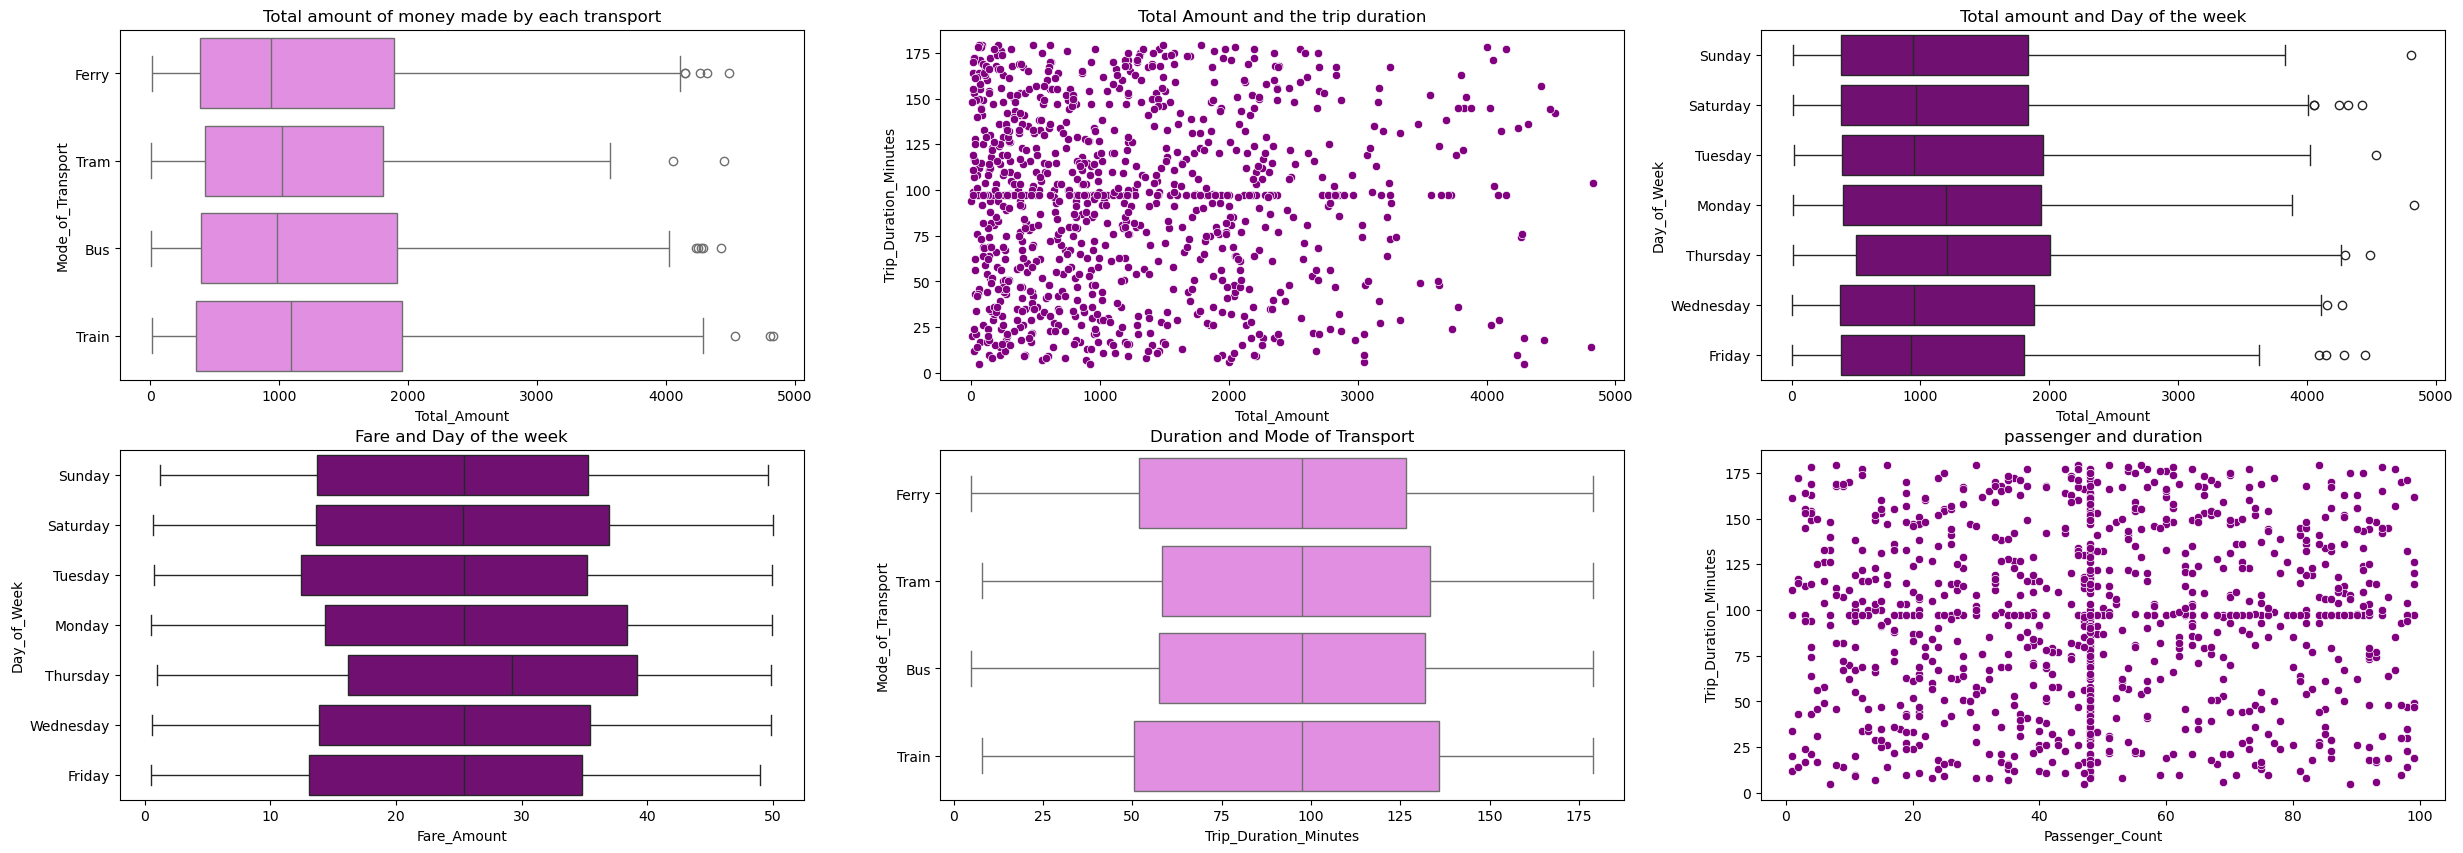

In [205]:
fig,axs=plt.subplots(nrows=2, ncols=3, figsize=(30,10))
#using box plot here

sns.boxplot(x="Total_Amount", y="Mode_of_Transport", data=df, ax=axs[0,0],color="Violet")
axs[0,0].set_title("Total amount of money made by each transport")

sns.scatterplot(x="Total_Amount", y="Trip_Duration_Minutes", data=df, ax=axs[0,1],color="purple")
axs[0,1].set_title("Total Amount and the trip duration")

sns.boxplot(x="Total_Amount", y="Day_of_Week", data=df, ax=axs[0,2],color="purple")
axs[0,2].set_title("Total amount and Day of the week")

sns.boxplot(x="Fare_Amount", y="Day_of_Week", data=df, ax=axs[1,0], color="purple")
axs[1,0].set_title("Fare and Day of the week")

sns.boxplot(x="Trip_Duration_Minutes", y="Mode_of_Transport", data=df, ax=axs[1,1],color="Violet")
axs[1,1].set_title("Duration and Mode of Transport")

sns.scatterplot(x="Passenger_Count", y="Trip_Duration_Minutes", data=df, ax=axs[1,2],color="purple")
axs[1,2].set_title("passenger and duration");

# Your analysis for Bivariate here

##### The first box plot shows the relationship between mode of transport and total amount made and the concentration is between 300 and 1800, this means that the total amount paid by either bus or ferry or train and tram is within 1800$ however there are outliers which means that the total amount paid for train trasport was up to 4800 while for ferry and bus, it was almost 4500. Ferry's minimum total amount 300 and the maximum total amount paid for is about 1700,  I think passengers still prefer to pay more for Ferry as a mode of transportation than others.

##### the 2nd graph shows that there are people who spent close to 100 minutes on their trip to their destination irrespective of the total amount.

##### Looking at the 3rd graph that shows relationship between day of the week and total amount, it is a bit unusual on thursday because total amount made varies between 800 and 1800 while other mode of transportation is between 500 and 1500 dollars. This means total amount made on a daily basis is between 500 and 1800. The outliers are to the right which means total amount can reach up to 4800 on some certain days such as sundays or mondays.

##### On the 4th graph, it means on Mondays, passengers can pay up to 38$, while on sundays, passenger pays between 12 and 35 dollars, While the most fare amount is between 12 and 35, on thursday, passengers still pays up to 39 dollars

##### On the 5th graph, mode of transport and trip duration in minutes, ferry takes betwwen 53 and 126 minutes while Train takes a minimum of 51 minutes and a max of 130 minutes. This gives us a clue into how long stays on any mode of transportation. This means that the minimum anypassenger can use on transport is 51 minutes and the maximum they can spend is 130 minutes. I believe people of high class prefer Ferry because despite the fare amount, it sells more. it is considered a luxury

##### On the 6th scatter plot, atleast 48 passenger count spends about 98 minutes while on commute to their destinations.


# Multivariate Analysis

In [ ]:
df.columns

,Mode_of_Transport,Metric,Total
0,Bus,Passenger_Count,16280.000000
1,Ferry,Passenger_Count,14304.000000
2,Train,Passenger_Count,11435.000000
3,Tram,Passenger_Count,7020.000000
4,Bus,Fare_Amount,8499.050102
5,Ferry,Fare_Amount,7024.721698
6,Train,Fare_Amount,6356.120257
7,Tram,Fare_Amount,3485.161341
8,Bus,Trip_Duration_Minutes,31984.500000
9,Ferry,Trip_Duration_Minutes,26440.000000


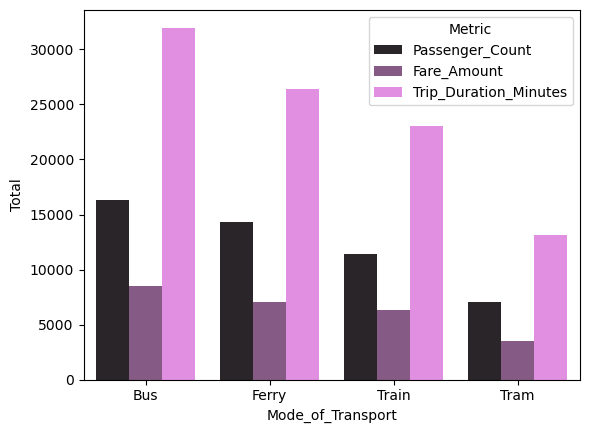

In [193]:
procat=df.groupby("Mode_of_Transport")[["Passenger_Count", "Fare_Amount", "Trip_Duration_Minutes"]].sum().reset_index()
procat=pd.melt(procat, id_vars= "Mode_of_Transport", var_name= "Metric", value_name= "Total")
sns.barplot(data=procat, x="Mode_of_Transport", y="Total", hue="Metric", palette="dark:Violet")
procat

# Narrate your observation
##### Using mode of transport to define relationship between number of passengers, fare amount and trip duration.


##### The bus mode of transportation is the first choice for passengers, although its fare amount is higher than other mode of transportation, and despite its long duration, passengers still prefer it. It is probably a Bus used to commute when people are going for excursions and vacation.

##### The Ferry type of transporation is the 2nd most favourite mode of transportation for people  because despite its long duration, and fare amount, people prefer it to the train and the tram  and it could be for sight seeing so people pay to be on it for long hours

##### The train's mode of transportation has the 3rd rank mode of transport due to its count of passengers, although the fare amount and the trip duration in minutes is lower than Ferry and the Bus, people still prefer it to the Tram. 

##### Tram is the lowest in trip duration and even fare amount, yet people dont really fancy it. This could be due to its short duration. Since they are for short distance, it defeats the leisure and excursion purposes. Hence people are not willing to use it, even tho its the shortest and lowest fare amount.

##### It shows that the set of passengers using this transport mode are people who want to socialize, people who wants to network, play, relax, see some nice places and have fun.

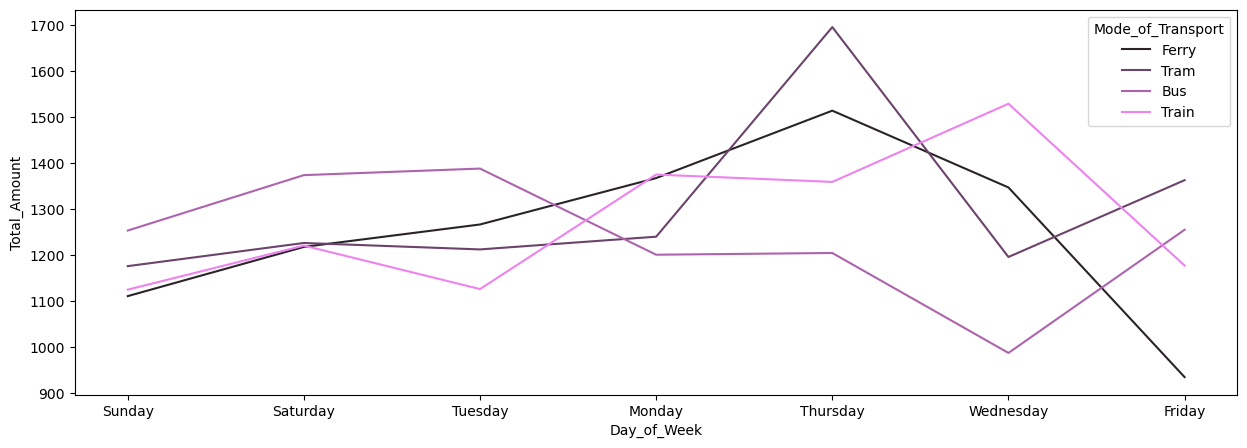

In [223]:
#this is for trendline

plt.figure(figsize=(15,5))
sns.lineplot(x="Day_of_Week",y="Total_Amount",data=df, hue="Mode_of_Transport", errorbar=None, palette="dark:violet");

#Narrate your observation

#### The trendline shows that the Tram makes the highest total amount on thursdays and has the shortest trip duration
#### If there is a correllation between passenger count and total amount, this means that the tram makes the highest total amount within the week.
#### As passenger count begins to rise for tram, its total amount starts rising too and rises faster than the others mode of transport
#### for ferry, high passenger count does not translate to  highest total amount or fare amount

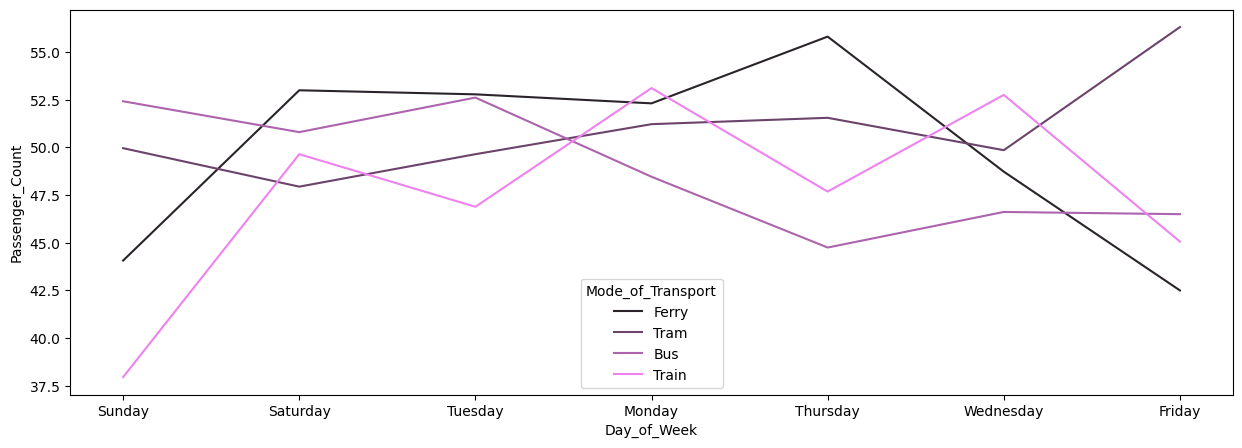

In [225]:
#this is for trendline

plt.figure(figsize=(15,5))
sns.lineplot(x="Day_of_Week",y="Passenger_Count",data=df, hue="Mode_of_Transport", errorbar=None, palette="dark:violet");

#### Tram has the highest passenger count on Fridays which is the most travelled day followed by the Ferry which happenes on thursdays 
#### the train has the lowest passenger count on sundays 
#### On Mondays, the train has the highest passenger count
#### while passenger counts has begun to reduce for Ferry, Bus and Train, it has started to peak for the Tram

In [ ]:
df.columns

In [227]:
df.pivot_table(values="Total_Amount", index="year", columns="month",aggfunc="sum")

month,1,2
year,,
2024,936898.233548,311769.94316


In [ ]:
#visualize using heatmap

numerical_data=df.select_dtypes(exclude='object')
numerical_data.head()

# finding correllation

<Axes: >

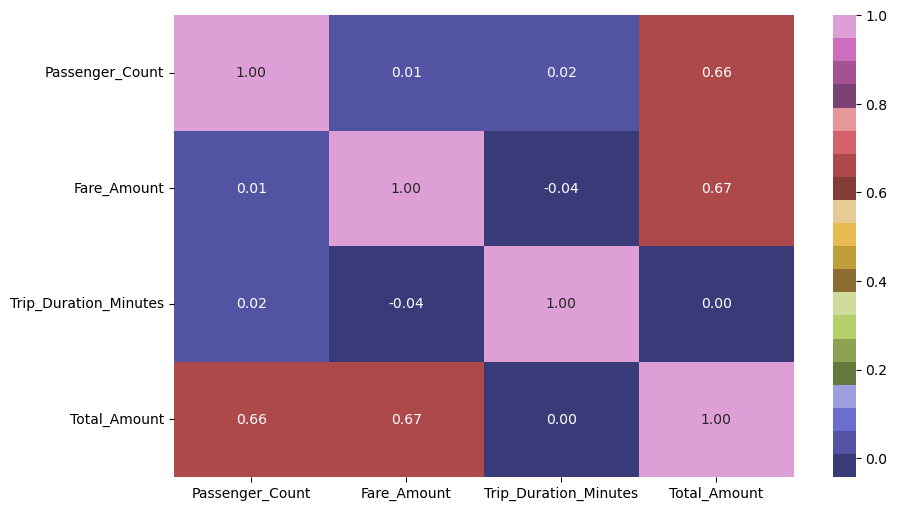

In [229]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[["Passenger_Count", "Fare_Amount",'Trip_Duration_Minutes', 'Total_Amount']].corr(), annot=True, fmt=".2f", cmap="tab20b")
 
#plt.figure(figsize=(10,5))
#sns.heatmap(df[['Passenger_Count', 'Fare_Amount', 'Trip_Duration_Minutes', 'Total_Amount']].corr(), annot=True, cmap='BuPu')
#plt.title("Correlation Matrix of Numeric Variables")
#plt.show()

##### There is a strong correllation between passenger count and Total amount at 0.66, 
##### this means passnger count determines the total amount.
##### there is a weak correlation between fare amount and trip duration, 
##### this means fare amount doesnt really determine the trip duration
##### there is a weak positive correlation between trip duration and passenger count. This means is a slight relationship between trip duration in minutes and passenger count, trip duration determines slightly the number of passengers.

In [221]:
df.head()

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,year,month,month_name,quarter,Total_Amount
0,Ferry,West_End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,2024,1,January,1,91.216483
1,Tram,North_Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,2024,1,January,1,950.975482
2,Bus,Central,North_Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday,2024,1,January,1,2311.750939
3,Ferry,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Sunday,2024,1,January,1,101.722157
4,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday,2024,1,January,1,1676.654527
